## Data Preparation

In [1]:
import pandas as pd
df=pd.read_excel('heart_disease.xlsx',sheet_name=1)
df_0=pd.read_excel('heart_disease.xlsx',sheet_name=0)
print(df.shape)
print(df.dtypes)

# print all the columns in the data use this
pd.set_option('display.max_columns',13)
df
# df_0

(908, 13)
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [44]:
# checking any null value are present 
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [2]:
df['oldpeak'].fillna(0,inplace=True)
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

## Exploratory Data Analysis (EDA)

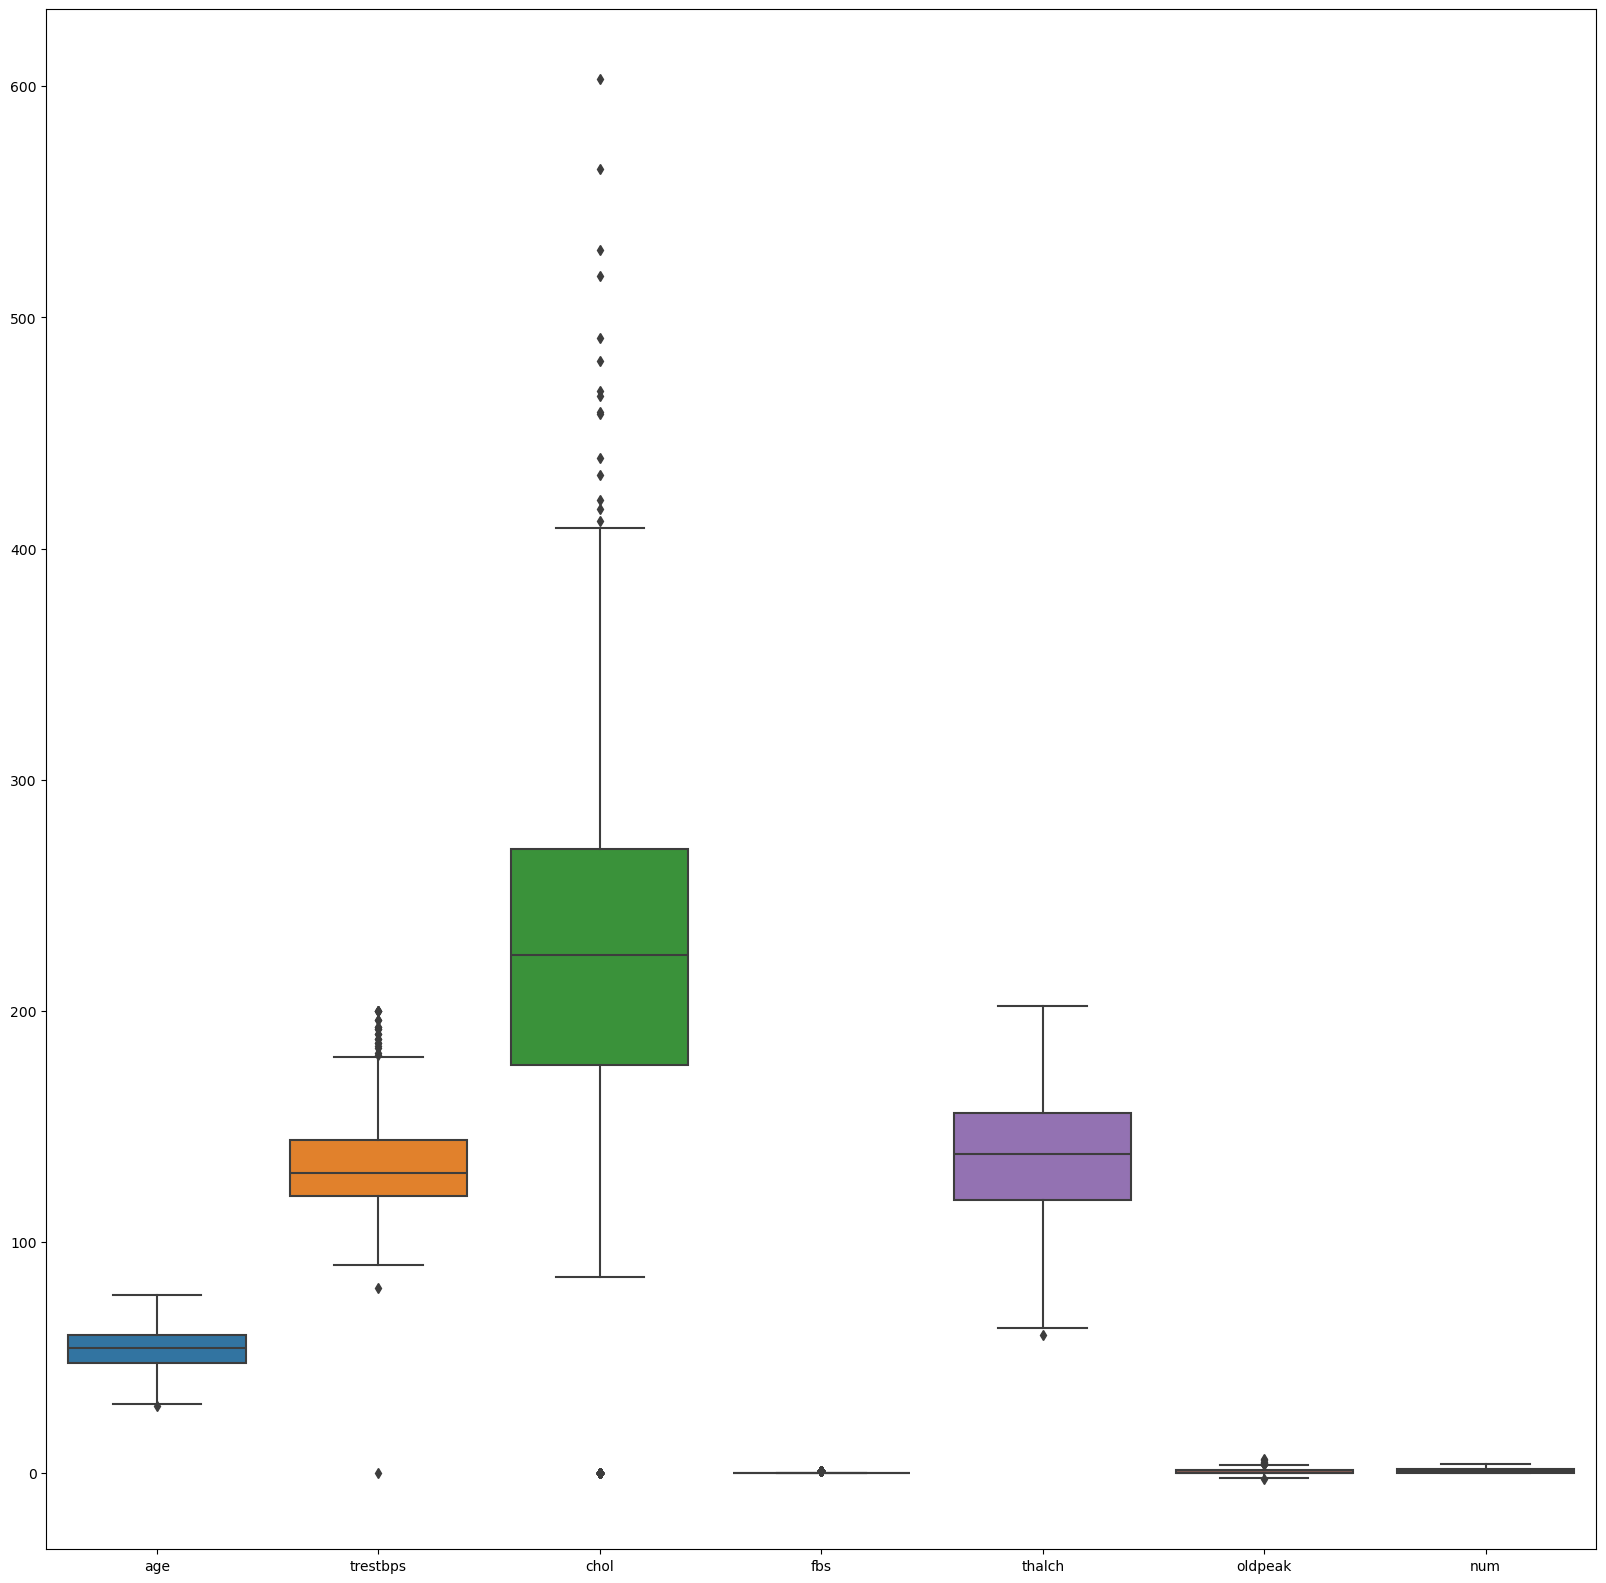

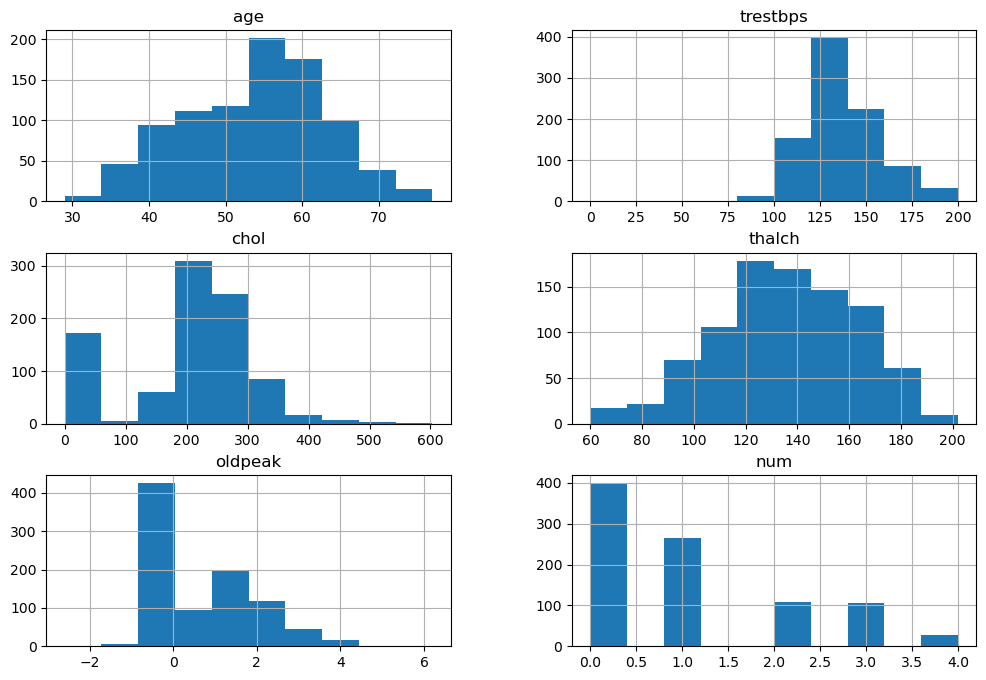

In [15]:
# box-plot

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)



# Histogrtam
df.hist(figsize=(12,8))
plt.show()


In [3]:
#in exang column the data entered is true or false but it is in object foramte and also 
# they are writen  True as -->True ,TURE so this is to be convert into boolean formate(True)
df.dtypes

df['exang'].unique()

df['exang'] = df['exang'].apply(lambda x: True if x in [True, 'TURE'] else False)
df['exang'].value_counts()

exang
False    535
True     373
Name: count, dtype: int64

In [4]:
# Encoding the object columns

# Select only the object-type columns
object_columns = df.select_dtypes(include=['object']).loc[:, df.dtypes != 'bool']
# col=object_columns[['slope','thal']]
#


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in object_columns:
    df[i]=le.fit_transform(df[i])
    # print(i)
df


from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(df.iloc[:,:12])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,False,1.5,2,2,4
904,62,1,0,166,170,False,2,120,True,3.0,1,2,4
905,56,1,2,170,0,False,0,123,True,2.5,0,1,4
906,56,1,2,144,208,True,2,105,True,0.0,0,0,4


In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.192634,0.196808,-0.054644,0.058691,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.187388,0.072209,-0.045065,0.068439,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.343597,-0.177926,0.092177,-0.080093,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.151984,0.111777,0.006748,0.056369,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.037019,0.036136,0.047292,-0.016943,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.027807,-0.010196,-0.026636,-0.017255,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.085640,-0.068911,-0.084796,-0.112161,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.349191,-0.091118,0.224048,0.006171,-0.323058
exang,0.192634,0.187388,-0.343597,0.151984,-0.037019,0.027807,0.085640,-0.349191,1.000000,0.334588,-0.161810,0.085812,0.359549
oldpeak,0.196808,0.072209,-0.177926,0.111777,0.036136,-0.010196,-0.068911,-0.091118,0.334588,1.000000,-0.181328,0.097990,0.387987


## Decision Tree Classification

In [48]:
# data Partition
X=df.iloc[:,:12]
Y=df['num']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, precision_score,recall_score
from sklearn.metrics import f1_score,accuracy_score
import numpy as np

training_error = []
test_error = []
test_accuracy_score = []
test_precision_score = []
test_f1_score = []
test_recall_score = []


for i in range(1,300,1):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))
    test_error.append(np.sqrt(mean_squared_error(y_pred_test, y_test)))

    test_precision_score.append(precision_score(y_test,y_pred_test,average='weighted',labels=np.unique(y_pred_test)))
    
    test_recall_score.append(recall_score(y_test,y_pred_test,average='weighted',labels=np.unique(y_pred_test)))
    
    test_f1_score.append(f1_score(y_test, y_pred_test, average='weighted'))

    test_accuracy_score.append(accuracy_score(y_test, y_pred_test))

# Print the results
print("CrossValidation-DecisionTreeRegressor-Training Error:", np.mean(training_error))
print("CrossValidation-DecisionTreeRegressor-Testing Error:", np.mean(test_error))
print("Variance:", np.mean(test_error) - np.mean(training_error))

print("CV- Test prescision score: ",np.mean(test_precision_score).round(2))

print("CV- Test recall score: ",np.mean(test_recall_score).round(2))

print("CV- Test f1 score: ",np.mean(test_f1_score).round(2))

print("CV- Test accuray score: ",np.mean(test_accuracy_score).round(2))

C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CrossValidation-DecisionTreeRegressor-Training Error: 0.0
CrossValidation-DecisionTreeRegressor-Testing Error: 1.261876948242558
Variance: 1.261876948242558
CV- Test prescision score:  0.48
CV- Test recall score:  0.47
CV- Test f1 score:  0.47
CV- Test accuray score:  0.47


C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


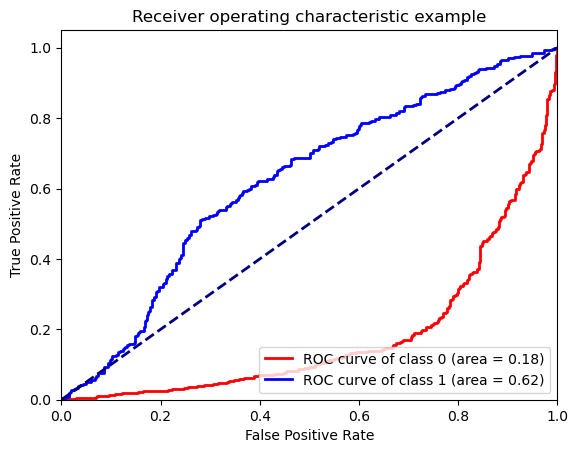

In [22]:
# ROC curve

from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_test,y_test)
# Get model predictions
predictions = clf.predict_proba(X)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y == i, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
import matplotlib.pyplot as plt
colors = ['red', 'blue']
lw = 2
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", accuracy)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Test accuracy: 0.47802197802197804


## Visualize the Decision-Tree

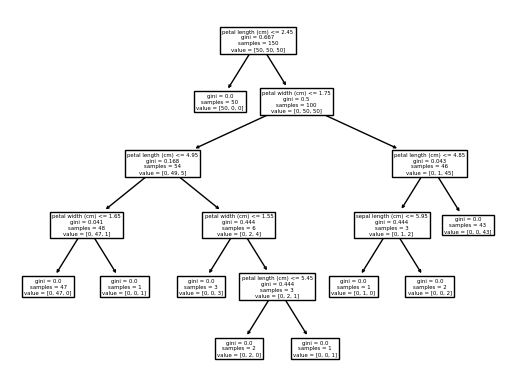

In [38]:

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model on the data
clf.fit(iris.data, iris.target)

# Visualize the decision tree
plot_tree(clf, feature_names=iris.feature_names)

# Show the plot
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix
clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Calculate the precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')

# Print the precision score
print("Precision:", precision)

Confusion matrix:
[[73  0  0  0  0]
 [ 0 53  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0  7]]
Accuracy: 1.0
Precision: 1.0
